In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold

In [2]:
gait_data = pd.read_csv('/content/gait.data')


In [4]:
gait_data.head(5)
#hoehnyahr 5,updrs/14 5,
#hoehnyahr+(updrs/14)+ 

,ID,Study,Group,Subjnum,Gender,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
0,GaPt03,Ga,PD,3,female,82,1.45,50,3.0,20,10,36.34,0.00,0.78
1,GaPt04,Ga,PD,4,male,68,1.71,0,2.5,25,8,11.00,0.64,0.82
2,GaPt05,Ga,PD,5,female,82,1.53,51,2.5,24,5,14.50,0.91,0.61
3,GaPt06,Ga,PD,6,male,72,1.70,82,2.0,16,13,10.47,0.85,0.94
4,GaPt07,Ga,PD,7,female,53,1.67,54,3.0,44,22,18.34,0.68,0.58


In [5]:
gait_data.shape

(166, 14)

In [6]:
gait_data.info


<bound method DataFrame.info of          ID Study Group  Subjnum  Gender  Age  Height (meters)  Weight (kg)  \
0    GaPt03    Ga    PD        3  female   82             1.45           50   
1    GaPt04    Ga    PD        4    male   68             1.71            0   
2    GaPt05    Ga    PD        5  female   82             1.53           51   
3    GaPt06    Ga    PD        6    male   72             1.70           82   
4    GaPt07    Ga    PD        7  female   53             1.67           54   
..      ...   ...   ...      ...     ...  ...              ...          ...   
161  SiCo26    Si    CO       26    male   60             1.74           72   
162  SiCo27    Si    CO       27    male   67             1.90           95   
163  SiCo28    Si    CO       28    male   61             1.70           72   
164  SiCo29    Si    CO       29    male   53             1.70           87   
165  SiCo30    Si    CO       30    male   63             1.74           82   

     HoehnYahr  UPD

In [7]:
gait_data.isnull().sum()

ID                  0
Study               0
Group               0
Subjnum             0
Gender              0
Age                 0
Height (meters)     0
Weight (kg)         0
HoehnYahr           0
UPDRS               0
UPDRSM              0
TUAG                0
Speed_01 (m/sec)    0
Speed_10            0
dtype: int64

In [8]:
gait_data.describe()

,Subjnum,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
count,166.000000,166.000000,166.000000,166.000000,166.00000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,16.469880,65.138554,56.592651,71.246988,1.26506,17.457831,10.716867,10.063193,1.119096,0.116506
std,9.549663,9.200070,78.449504,15.415630,1.15296,17.921243,11.068846,4.448807,0.230393,0.332407
min,1.000000,36.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.250000,59.000000,1.650000,63.000000,0.00000,0.000000,0.000000,8.695000,1.010000,0.000000
50%,16.000000,65.000000,1.730000,72.000000,2.00000,16.500000,10.000000,10.075000,1.140000,0.000000
75%,23.750000,71.000000,160.000000,80.000000,2.00000,32.000000,19.000000,11.612500,1.260000,0.000000
max,40.000000,86.000000,185.000000,105.000000,3.00000,70.000000,44.000000,36.340000,1.540000,1.530000


In [9]:
gait_data['HoehnYahr'].value_counts()
gait_data['UPDRS'].value_counts()
gait_data['UPDRSM'].value_counts()
gait_data['TUAG'].value_counts()

0.00     13
11.22     3
9.97      3
7.49      3
7.16      3
         ..
10.03     1
12.22     1
10.50     1
16.09     1
8.68      1
Name: TUAG, Length: 133, dtype: int64

In [10]:
gait_data.groupby('HoehnYahr').mean()

<ipython-input-10-b6fcfe09cb0f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gait_data.groupby('HoehnYahr').mean()


,Subjnum,Age,Height (meters),Weight (kg),UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
HoehnYahr,,,,,,,,,
0.0,13.547945,63.657534,61.163699,71.767123,0.287671,0.287671,8.019726,1.240959,0.089315
2.0,19.890909,64.218182,37.510545,73.181818,29.490909,19.072727,10.783455,1.086364,0.146727
2.5,18.678571,68.785714,78.721786,70.464286,31.857143,18.142857,11.026786,1.004286,0.051071
3.0,12.800000,70.800000,66.214000,59.000000,36.300000,20.100000,18.321000,0.731000,0.332000


In [11]:
gait_data.groupby('UPDRS').mean()

<ipython-input-11-a12b57a6e23c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gait_data.groupby('UPDRS').mean()


,Subjnum,Age,Height (meters),Weight (kg),HoehnYahr,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
UPDRS,,,,,,,,,
0,14.661290,61.790323,60.904032,72.016129,0.072581,0.000000,8.422097,1.228548,0.085000
1,6.375000,73.750000,44.003750,72.000000,0.000000,1.000000,4.243750,1.202500,0.000000
2,10.500000,65.000000,80.850000,52.500000,0.000000,2.000000,8.210000,1.315000,0.625000
3,5.666667,75.666667,59.470000,75.000000,0.000000,3.000000,7.963333,1.343333,0.000000
13,14.000000,67.000000,158.000000,63.000000,2.000000,8.000000,10.500000,0.910000,0.000000
14,3.000000,74.000000,164.000000,65.000000,2.500000,10.000000,9.590000,0.990000,0.000000
15,11.000000,69.750000,89.067500,73.000000,2.000000,11.250000,12.080000,1.112500,0.057500
16,16.500000,65.000000,85.850000,73.500000,2.000000,13.000000,11.570000,0.995000,0.470000
17,19.000000,68.000000,160.000000,60.000000,2.000000,13.000000,10.000000,1.180000,0.000000


In [12]:
gait_data.groupby('UPDRSM').mean()

<ipython-input-12-fd82056ec2ab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gait_data.groupby('UPDRSM').mean()


,Subjnum,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,TUAG,Speed_01 (m/sec),Speed_10
UPDRSM,,,,,,,,,
0,14.661290,61.790323,60.904032,72.016129,0.072581,0.000000,8.422097,1.228548,0.085000
1,6.375000,73.750000,44.003750,72.000000,0.000000,1.000000,4.243750,1.202500,0.000000
2,10.500000,65.000000,80.850000,52.500000,0.000000,2.000000,8.210000,1.315000,0.625000
3,5.666667,75.666667,59.470000,75.000000,0.000000,3.000000,7.963333,1.343333,0.000000
5,15.500000,80.000000,1.525000,55.500000,2.500000,24.000000,10.885000,1.075000,0.305000
7,12.000000,59.000000,1.630000,67.000000,2.000000,25.000000,8.370000,1.260000,1.130000
8,8.666667,67.666667,53.780000,40.000000,2.166667,17.666667,10.536667,0.866667,0.350000
10,12.166667,72.000000,83.491667,71.666667,2.416667,19.666667,13.893333,0.951667,0.318333
11,13.500000,71.500000,175.000000,84.500000,2.000000,16.500000,13.985000,0.975000,0.000000


In [13]:
gait_data.groupby('TUAG').mean()

<ipython-input-13-efdc979c43c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gait_data.groupby('TUAG').mean()


,Subjnum,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,Speed_01 (m/sec),Speed_10
TUAG,,,,,,,,,
0.00,9.538462,69.461538,26.827692,78.538462,0.5,6.307692,4.0,1.127692,0.192308
6.23,12.000000,37.000000,1.610000,54.000000,0.0,0.000000,0.0,1.540000,0.000000
7.06,17.000000,65.000000,170.000000,60.000000,0.0,0.000000,0.0,1.540000,0.000000
7.07,9.000000,65.000000,182.000000,83.000000,0.0,0.000000,0.0,1.050000,0.000000
7.13,16.000000,66.000000,172.000000,83.000000,0.0,0.000000,0.0,1.480000,0.000000
...,...,...,...,...,...,...,...,...,...
16.29,6.000000,78.000000,175.000000,82.000000,2.5,21.000000,12.0,0.830000,0.000000
18.34,7.000000,53.000000,1.670000,54.000000,3.0,44.000000,22.0,0.680000,0.580000
25.01,23.000000,71.000000,1.600000,0.000000,3.0,51.000000,25.0,0.360000,0.000000


In [15]:
X=gait_data.drop(['ID','Gender'],axis=1)



In [17]:
Y=gait_data['TUAG']

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
print('X.shape is:',X.shape)
print('X_train shape is:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('Y.shape is:',Y.shape)

X.shape is: (166, 12)
X_train shape is: (132, 12)
X_test.shape: (34, 12)
Y.shape is: (166,)


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
gait_data['Height (meters)']=gait_data['Height (meters)'].astype('category')
gait_data['Weight (kg)']=gait_data['Weight (kg)'].astype('category')
gait_data['HoehnYahr']=gait_data['HoehnYahr'].astype('category')
gait_data['UPDRS']=gait_data['UPDRS'].astype('category')
gait_data['UPDRSM']=gait_data['UPDRSM'].astype('category')
gait_data['TUAG']=gait_data['TUAG'].astype('category')

In [22]:
gait_data.dtypes

ID                    object
Study                 object
Group                 object
Subjnum                int64
Gender                object
Age                    int64
Height (meters)     category
Weight (kg)         category
HoehnYahr           category
UPDRS               category
UPDRSM              category
TUAG                category
Speed_01 (m/sec)     float64
Speed_10             float64
dtype: object

In [23]:
gait_data.describe()


,Subjnum,Age,Speed_01 (m/sec),Speed_10
count,166.000000,166.000000,166.000000,166.000000
mean,16.469880,65.138554,1.119096,0.116506
std,9.549663,9.200070,0.230393,0.332407
min,1.000000,36.000000,0.000000,0.000000
25%,8.250000,59.000000,1.010000,0.000000
50%,16.000000,65.000000,1.140000,0.000000
75%,23.750000,71.000000,1.260000,0.000000
max,40.000000,86.000000,1.540000,1.530000


In [24]:
gait_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Subjnum,166.0,16.469880,9.549663,1.0,8.25,16.00,23.75,40.00
Age,166.0,65.138554,9.200070,36.0,59.00,65.00,71.00,86.00
Speed_01 (m/sec),166.0,1.119096,0.230393,0.0,1.01,1.14,1.26,1.54
Speed_10,166.0,0.116506,0.332407,0.0,0.00,0.00,0.00,1.53


In [25]:
tuag_data = gait_data.groupby('TUAG').mean().round(4)
print(tuag_data)

       Subjnum      Age  Speed_01 (m/sec)  Speed_10
TUAG                                               
0.0     9.5385  69.4615            1.1277    0.1923
6.23   12.0000  37.0000            1.5400    0.0000
7.06   17.0000  65.0000            1.5400    0.0000
7.07    9.0000  65.0000            1.0500    0.0000
7.13   16.0000  66.0000            1.4800    0.0000
...        ...      ...               ...       ...
16.29   6.0000  78.0000            0.8300    0.0000
18.34   7.0000  53.0000            0.6800    0.5800
25.01  23.0000  71.0000            0.3600    0.0000
25.25  18.0000  82.0000            0.4100    0.0000
36.34   3.0000  82.0000            0.0000    0.7800

[133 rows x 4 columns]


<ipython-input-25-106071c3f728>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tuag_data = gait_data.groupby('TUAG').mean().round(4)


In [28]:
import seaborn as sns
sns.set_style('whitegrid')

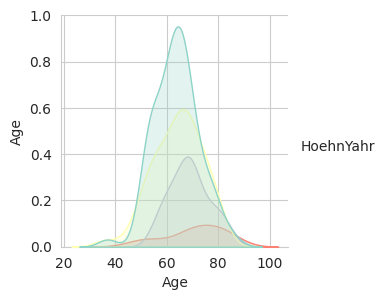

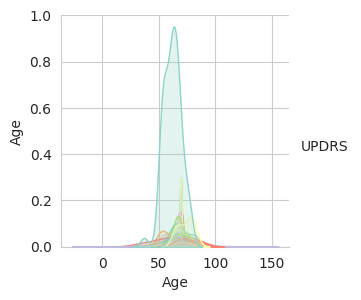

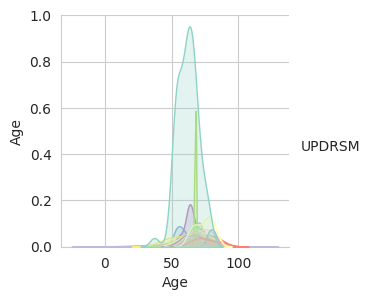

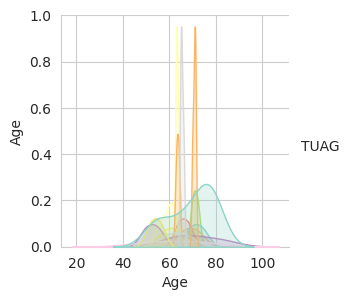

In [29]:
sns.pairplot(gait_data[['Age','Height (meters)','Weight (kg)','HoehnYahr','UPDRS','UPDRSM','TUAG']],  
            hue='HoehnYahr',
            height=3,
            palette='Set3')
sns.pairplot(gait_data[['Age','Height (meters)','Weight (kg)','HoehnYahr','UPDRS','UPDRSM','TUAG']],  
            hue='UPDRS',
            height=3,
            palette='Set3')
sns.pairplot(gait_data[['Age','Height (meters)','Weight (kg)','HoehnYahr','UPDRS','UPDRSM','TUAG']],  
            hue='UPDRSM',
            height=3,
            palette='Set3')
sns.pairplot(gait_data[['Age','Height (meters)','Weight (kg)','HoehnYahr','UPDRS','UPDRSM','TUAG']],  
            hue='TUAG',
            height=3,
            palette='Set3')

<ipython-input-30-b29e088c7044>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gait_data.corr(), annot=True)


<Axes: >

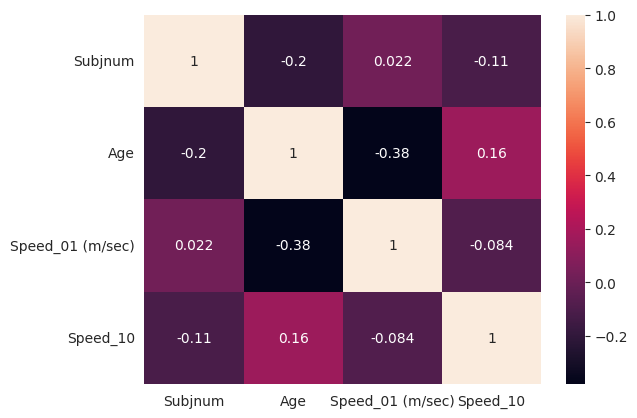

In [30]:
sns.heatmap(gait_data.corr(), annot=True)

In [31]:
gait_data.dtypes

ID                    object
Study                 object
Group                 object
Subjnum                int64
Gender                object
Age                    int64
Height (meters)     category
Weight (kg)         category
HoehnYahr           category
UPDRS               category
UPDRSM              category
TUAG                category
Speed_01 (m/sec)     float64
Speed_10             float64
dtype: object

In [32]:
data = pd.get_dummies(gait_data)

In [33]:
gait_data.columns

Index(['ID', 'Study', 'Group', 'Subjnum', 'Gender', 'Age', 'Height (meters)',
       'Weight (kg)', 'HoehnYahr', 'UPDRS', 'UPDRSM', 'TUAG',
       'Speed_01 (m/sec)', 'Speed_10'],
      dtype='object')

In [34]:
gait_data['Height (meters)']=gait_data['Height (meters)'].astype('float64')
gait_data['Weight (kg)']=gait_data['Weight (kg)'].astype('float64')
gait_data['HoehnYahr']=gait_data['HoehnYahr'].astype('float64')
gait_data['UPDRS']=gait_data['UPDRS'].astype('float64')
gait_data['UPDRSM']=gait_data['UPDRSM'].astype('float64')
gait_data['TUAG']=gait_data['TUAG'].astype('float64')

In [35]:
y1=gait_data['HoehnYahr']
y2=y1*10
y3=gait_data['UPDRS']
y4=gait_data['UPDRSM']
y5=y4*31.25
y=y2+y3+y5/3

In [37]:
x1=gait_data.drop('HoehnYahr',axis=1)
x2=x1.drop('UPDRS',axis=1)
x3=x2.drop('UPDRSM',axis=1)
x=x3.drop('TUAG',axis=1)



In [38]:
from sklearn.model_selection import train_test_split


In [39]:
x=gait_data.drop(['ID','Study','Group','Subjnum','Gender'],axis=1)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=1 )

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(x_train,y_train)


LinearRegression()

In [44]:
lr.score(x_test,y_test)

1.0

In [45]:
lr.score(x_train,y_train)

1.0

In [46]:
y_pred=lr.predict(x_test)

In [48]:
#hata kareler ortalamasi
from sklearn.metrics import mean_squared_error

In [49]:
import math
a=math.sqrt(mean_squared_error(y_test,y_pred))
#print('Sum of the squared error is:',mean_squared_error) 
print('Mean squared error is:',a)
#b=math.sqrt(a)
#print('Square of of mean squar error is:',math.sqrt(a))

Mean squared error is: 1.1855998086788506e-13


In [50]:
data_new=x_train[:5]
data_new


,Age,Height (meters),Weight (kg),HoehnYahr,UPDRS,UPDRSM,TUAG,Speed_01 (m/sec),Speed_10
105,67,1.58,72.0,0.0,0.0,0.0,8.10,1.21,0.0
42,67,158.00,63.0,2.0,13.0,8.0,10.50,0.91,0.0
145,50,1.70,68.0,0.0,0.0,0.0,8.79,1.44,0.0
51,68,160.00,69.0,2.0,19.0,16.0,7.53,1.25,0.0
92,69,1.60,81.0,2.5,37.0,24.0,9.70,1.07,0.0


In [51]:
lr.predict(data_new)

array([ 2.29456004e-14,  1.16333333e+02, -8.66581857e-14,  2.05666667e+02,
        3.12000000e+02])

In [52]:
y_train[:5]


105      0.000000
42     116.333333
145      0.000000
51     205.666667
92     312.000000
dtype: float64